# Trabalho 1

## Regressão Logística

### Ajuste da taxa de aprendizado e número de iterações

A primeira etada é ajustar a taxa de aprendizado e o número de iterações. Após alterar os outros hyperparameters (fator de regularização e grau dos atributos polinimiais) será necessário realizar o ajuste fino, mas será algum valor próximo ao encontrado nesta etapa.

** imports necessários: **

In [1]:
from regressao_logistica_regularizado import RegularizedLogisticRegression
from experimentos import Dataset as DATASET
from experimentos import ModelSelection
from experimentos import Plot
from dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator

** varia alpha e número de iterações e plota os gráficos: **

In [ ]:
RLR = RegularizedLogisticRegression()
MS = ModelSelection()
DTS = DATASET()
PLT = Plot()

# carrega dataset
X,Y = RLR.load_dataset('datasets/mnist.csv', header=True)

degree = 18

X_pol = DTS.generate_polynomial_attributes(X, degree)
# normaliza
X_ =  DTS.dataset_scaling(X_pol)

# normaliza
#X_ =  DTS.dataset_scaling(X)

alphas = [14, 10, 7]
epochs = [1000]
Lambda = 0
colors = ['red', 'cyan', 'black', 'yellow', 'green', 'gray', 'darkblue']
fold = 1
errors = {}
val_errors = {}
loss = {}
for train,val in MS.k_fold(X_, k=5, shuffle=True):
    fig, ax = plt.subplots()
    errors[str(fold)] = []
    val_errors[str(fold)] = []
    loss[str(fold)] = []
    for e in epochs:
        legends = []
        for i,a in enumerate(alphas):
            # ajusta o modelo
            RLR.fit(X_[train], Y[train], X_[val], Y[val], epochs=e, learning_rate=a, Lambda=Lambda, print_results=False)
            
            # calcula o erro no treino
            errors[str(fold)].append(RLR.train_error)
            # calcula o erro no teste
            val_errors[str(fold)].append(RLR.val_error)
            # salva loss
            loss[str(fold)].append(RLR.loss)
            
            ax.plot(range(e+1), RLR.loss, color=colors[i], linewidth=1)
            legends.append(mpatches.Patch(color=colors[i], label='alpha = ' + str(a)))
        #title = u'Ajuste da taxa com #epocas = ' + str(e) + ' e $\lambda$ = ' + str(Lambda) + ' (fold ' + str(fold) + ')'
        plt.ylim([0.1, 1])
        plt.xlabel(u'Épocas')
        plt.ylabel(u'Custo')
        
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
        box.width, box.height * 0.9])
        ax.legend(handles=legends[:], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
        #plt.title(title)
        plt.grid(True)
    
        fig.savefig('fold' + str(fold) + '.eps')
        #plt.show()
        plt.close(fig)
        
        fold += 1
        
error = []        
val_error = []
loss_ = []
for k in ['1', '2', '3', '4','5']:
    error.append(errors[k])
    val_error.append(val_errors[k])
    loss_.append(loss[k])

fig, ax = plt.subplots()
for i,a in enumerate(alphas):
    mean = np.asarray(loss_).mean(axis=0)[i]
    stdeviation = np.asarray(loss_).std(axis=0)[i]
    print a, mean[-1], stdeviation[-1]
    
    ax.plot(range(epochs[0]+1), mean, color=colors[i], linewidth=1)
    ax.fill_between(range(epochs[0]+1), mean-stdeviation, mean+stdeviation , color=colors[i], linewidth=1, alpha=0.2)
    
title = u'Curva de aprendizado média com #epocas = ' + str(e) + ' e $\lambda$ = ' + str(Lambda)
plt.ylim([0.1, 1.])
plt.xlabel(u'Épocas')
plt.ylabel(u'Custo')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
box.width, box.height * 0.9])
lgd = ax.legend(handles=legends[:], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
#plt.title(title)
plt.grid(True)

fig.savefig('mnist_eta_alpha_fino.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close(fig)

** erro por época ** (pode ignorar)

In [ ]:
for i in range(len(alphas)):
    plt.plot(range(epochs[0]+1), np.asarray(error).mean(axis=0)[i], color=colors[i], linewidth=1)
    #legends.append(mpatches.Patch(color=colors[i], label='alpha = ' + str(a)))
title = 'erro no treino'
plt.ylim([0.05, 0.6])
plt.xlabel('epocas')
plt.ylabel('erro')
plt.legend(handles=legends[:], loc='upper right')
plt.title(title)
plt.grid(True)

plt.savefig('erro_treino.eps')
plt.show()


In [ ]:
for i in range(len(alphas)):
    plt.plot(range(epochs[0]+1), np.asarray(val_error).mean(axis=0)[i], color=colors[i], linewidth=1)
    #legends.append(mpatches.Patch(color=colors[i], label='alpha = ' + str(a)))
title = 'erro na validacao'
plt.ylim([0.05, 0.6])
plt.xlabel('epocas')
plt.ylabel('erro')
plt.legend(handles=legends[:], loc='upper right')
plt.title(title)
plt.grid(True)

plt.savefig('erro_validacao.eps')
plt.show()

In [ ]:
# cada linha é um alpha, cada coluna uma época e cada valor é um erro binário médio dos k-folds
#print "erro medio no treino ", np.asarray(error).mean(axis=0).shape
#print "desvio padrao no treino ", np.asarray(error).std(axis=0)
#print "erro medio na validacao ", np.asarray(val_error).mean(axis=0).shape
#print "desvio padrao na validacao ", np.asarray(val_error).std(axis=0)

for i,a in enumerate(alphas):
    print "alpha = ", a
    print "erro medio final no treino ", np.asarray(error).mean(axis=0)[i][-1]
    print "desvio padrao final no treino ", np.asarray(error).std(axis=0)[i][-1]
    print "erro medio final na validacao ", np.asarray(val_error).mean(axis=0)[i][-1]
    print "desvio padrao final na validacao ", np.asarray(val_error).std(axis=0)[i][-1]
    print "\n"

### Curva de validação: atributos polinomiais

O objetivo deste experimento é analisar se a geração de atributos polinomiais trazem melhoria de
desempenho e, mais especificamente, qual o grau de polinômio mais adequado para a tarefa. Portanto,
deve-se variar o grau dos atributos polinomiais a partir de 1 (sem atributos polinomiais) até um valor que
a curva de validação indique claramente que há overfitting. Neste experimento, não utilize
regularização.

In [ ]:
RLR = RegularizedLogisticRegression()
MS = ModelSelection()
DTS = DATASET()
PLT = Plot()

# carrega dataset
X,Y = RLR.load_dataset('datasets/mnist.csv', header=True)

# normaliza
#X_ =  DTS.dataset_scaling(X)

lr = 10
degrees = range(1,31)
e = 1000
Lambda = 0
colors = ['red', 'cyan', 'black', 'yellow', 'green', 'gray', 'darkblue']
fold = 1
errors = {}
val_errors = {}
loss = {}

for train,val in MS.k_fold(X, k=5, shuffle=True):
    errors[str(fold)] = []
    val_errors[str(fold)] = []
    loss[str(fold)] = []
    
    for d in degrees:
        X_pol = DTS.generate_polynomial_attributes(X, d)
        # normaliza
        X_ =  DTS.dataset_scaling(X_pol)
        
        # ajusta o modelo
        RLR.fit(X_[train], Y[train], X_[val], Y[val], epochs=e, learning_rate=lr, Lambda=Lambda, print_results=False)

        # calcula o erro no treino
        errors[str(fold)].append(RLR.train_error[-1])
        # calcula o erro no teste
        val_errors[str(fold)].append(RLR.val_error[-1])
        # salva loss
        loss[str(fold)].append(RLR.loss)

    fold += 1
        
train_error = []        
val_error = []
loss_ = []
for k in ['1', '2', '3', '4','5']:
    train_error.append(errors[k])
    val_error.append(val_errors[k])
    loss_.append(loss[k])

train_error = np.array(train_error)
val_error = np.array(val_error)
    
train_mean, train_std = train_error.mean(axis=0), train_error.std(axis=0)

val_mean, val_std = val_error.mean(axis=0), val_error.std(axis=0)

print train_mean
print train_std
print
print val_mean
print val_std

fig, ax = plt.subplots()
ax.plot(degrees, train_mean, color='red', linewidth=1)
ax.fill_between(degrees, train_mean-train_std, train_mean+train_std , color='red', linewidth=1, alpha=0.2)

ax.plot(degrees, val_mean, color='blue', linewidth=1)
ax.fill_between(degrees, val_mean-val_std, val_mean+val_std , color='blue', linewidth=1, alpha=0.2)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
legends = [mpatches.Patch(color='red', label='treino'), mpatches.Patch(color='blue', label=u'validação')]

title = u'Curva de aprendizado média com #epocas = ' + str(e) + ', $\lambda$ = ' + str(Lambda) + ' e $\alpha$ = ' + str(lr)
#plt.ylim([0.1, 1.])
plt.xlabel('$\eta$')
plt.ylabel(u'Erro Binário Médio')
plt.xticks(degrees)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
box.width, box.height * 0.9])
lgd = ax.legend(handles=legends[:], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
#plt.title(title)
plt.grid(True)

fig.savefig('curva_ap_eta.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close(fig)

### Curva de validação: Regularização

Neste experimento, o impacto do termo de regularização da descida de gradiente será
investigado. O objetivo é utilizar a geração de atributos polinomiais de um determinado grau onde
ocorra, claramente, uma situação de overfitting. Através da variação do peso da regularização, deve-se
investigar qual o valor ideal deste parâmetro. Isto deve ser feito através da análise da curva de
validação para este parâmetro. O objetivo final deste experimento é verificar se a utilização de
regularização de um modelo complexo (que apresenta forte overfitting sem o uso da regularização)
apresenta desempenho melhor do que a calibração do grau dos atributos polinomiais (experimento
anterior).

In [ ]:
RLR = RegularizedLogisticRegression()
MS = ModelSelection()
DTS = DATASET()
PLT = Plot()

# carrega dataset
X,Y = RLR.load_dataset('datasets/mnist.csv', header=True)

degree = 18

X_pol = DTS.generate_polynomial_attributes(X, degree)
# normaliza
X_ =  DTS.dataset_scaling(X_pol)

# normaliza
#X_ =  DTS.dataset_scaling(X)

lr = 10
e = 1000
Lambda = [0, 0.0005, 0.001, 0.005]
colors = ['red', 'cyan', 'black', 'yellow', 'green', 'gray', 'darkblue']
fold = 1
errors = {}
val_errors = {}
loss = {}

for train,val in MS.k_fold(X, k=5, shuffle=True):
    errors[str(fold)] = []
    val_errors[str(fold)] = []
    loss[str(fold)] = []
    
    for l in Lambda:
        
        
        # ajusta o modelo
        RLR.fit(X_[train], Y[train], X_[val], Y[val], epochs=e, learning_rate=lr, Lambda=l, print_results=False)

        # calcula o erro no treino
        errors[str(fold)].append(RLR.train_error[-1])
        # calcula o erro no teste
        val_errors[str(fold)].append(RLR.val_error[-1])
        # salva loss
        loss[str(fold)].append(RLR.loss)

    fold += 1
        
train_error = []        
val_error = []
loss_ = []
for k in ['1', '2', '3', '4','5']:
    train_error.append(errors[k])
    val_error.append(val_errors[k])
    loss_.append(loss[k])

train_error = np.array(train_error)
val_error = np.array(val_error)
    
train_mean, train_std = train_error.mean(axis=0), train_error.std(axis=0)

val_mean, val_std = val_error.mean(axis=0), val_error.std(axis=0)

print train_mean
print train_std
print
print val_mean
print val_std

fig, ax = plt.subplots()
ax.plot(Lambda, train_mean, color='red', linewidth=1)
ax.fill_between(Lambda, train_mean-train_std, train_mean+train_std , color='red', linewidth=1, alpha=0.2)

ax.plot(Lambda, val_mean, color='blue', linewidth=1)
ax.fill_between(Lambda, val_mean-val_std, val_mean+val_std , color='blue', linewidth=1, alpha=0.2)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
legends = [mpatches.Patch(color='red', label='treino'), mpatches.Patch(color='blue', label=u'validação')]

title = u'Curva de aprendizado média com #epocas = ' + str(e) + ', $\lambda$ = ' + str(Lambda) + ' e $\alpha$ = ' + str(lr)
#plt.ylim([0.1, 1.])
plt.xlabel('$\lambda$')
plt.ylabel(u'Erro Binário Médio')
plt.xticks(Lambda)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
box.width, box.height * 0.9])
lgd = ax.legend(handles=legends[:], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
#plt.title(title)
plt.grid(True)

fig.savefig('curva_ap_lambda.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close(fig)

### Curva de aprendizado

Neste experimento, deve-se utilizar a curva de aprendizado para analisar o melhor modelo
encontrado nos experimentos anteriores (grau de polinômio e peso da regularização). A curva gerada
deve ser analisada para depurar o modelo e concluir quais atitudes podem ser tomadas para melhorar o
desempenho do classificador, se for necessário. A curva gerada deve conter, pelo menos, 5 pontos (5
tamanhos diferentes do conjunto de treino).

** atributos polinomiais **

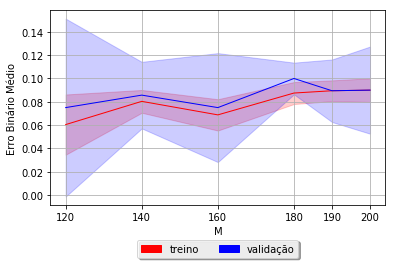

In [4]:
RLR = RegularizedLogisticRegression()
MS = ModelSelection()
DTS = DATASET()
PLT = Plot()

# carrega dataset
X,Y = RLR.load_dataset('datasets/mnist.csv', header=True)

degree = 2

X_pol = DTS.generate_polynomial_attributes(X, degree)
# normaliza
X_norm =  DTS.dataset_scaling(X_pol)

# normaliza
#X_norm =  DTS.dataset_scaling(X)

size = X.shape[0]

M = [int(0.6*size), int(0.7*size), int(0.8*size), int(0.9*size), int(0.95*size), int(size)]

lr = 10
e = 1000
Lambda = 0
colors = ['red', 'cyan', 'black', 'yellow', 'green', 'gray', 'darkblue']

errors = {}
val_errors = {}
loss = {}

indices = range(size)

train_mean = []
train_std = []
val_mean = []
val_std = []

for m in M:
    np.random.shuffle(indices)
    X_ = np.array(X_norm[indices[0:m]])
    Y_ = np.array(Y[indices[0:m]])
    fold = 1
    for train,val in MS.k_fold(X_, k=5, shuffle=True):
        errors[str(fold)] = []
        val_errors[str(fold)] = []
        loss[str(fold)] = []

        # ajusta o modelo
        RLR.fit(X_[train], Y_[train], X_[val], Y_[val], epochs=e, learning_rate=lr, Lambda=Lambda, print_results=False)

        # calcula o erro no treino
        errors[str(fold)].append(RLR.train_error[-1])
        # calcula o erro no teste
        val_errors[str(fold)].append(RLR.val_error[-1])
        # salva loss
        loss[str(fold)].append(RLR.loss)

        fold += 1
        
    train_error = []        
    val_error = []
    loss_ = []
    for k in ['1', '2', '3', '4','5']:
        train_error.append(errors[k])
        val_error.append(val_errors[k])
        loss_.append(loss[k])

    train_error = np.array(train_error)
    val_error = np.array(val_error)

    train_mean.append(train_error.mean(axis=0)[0])
    train_std.append(train_error.std(axis=0)[0])

    val_mean.append(val_error.mean(axis=0)[0])
    val_std.append(val_error.std(axis=0)[0])

    #print train_mean
    #print train_std
    #print
    #print val_mean
    #print val_std

train_mean = np.array(train_mean)
train_std = np.array(train_std)
val_mean = np.array(val_mean)
val_std = np.array(val_std)
    
fig, ax = plt.subplots()
ax.plot(M, train_mean, color='red', linewidth=1)
ax.fill_between(M, train_mean-train_std, train_mean+train_std , color='red', linewidth=1, alpha=0.2)

ax.plot(M, val_mean, color='blue', linewidth=1)
ax.fill_between(M, val_mean-val_std, val_mean+val_std , color='blue', linewidth=1, alpha=0.2)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
legends = [mpatches.Patch(color='red', label='treino'), mpatches.Patch(color='blue', label=u'validação')]

title = u'Curva de aprendizado média com #epocas = ' + str(e) + ', $\lambda$ = ' + str(Lambda) + ' e $\alpha$ = ' + str(lr)
#plt.ylim([0.1, 1.])
plt.xlabel('M')
plt.ylabel(u'Erro Binário Médio')
plt.xticks(M)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
box.width, box.height * 0.9])
lgd = ax.legend(handles=legends[:], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
#plt.title(title)
plt.grid(True)

fig.savefig('curva_ap_M_reg.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close(fig)

** regularização **

In [ ]:
RLR = RegularizedLogisticRegression()
MS = ModelSelection()
DTS = DATASET()
PLT = Plot()

# carrega dataset
X,Y = RLR.load_dataset('datasets/mnist.csv', header=True)

degree = 18

X_pol = DTS.generate_polynomial_attributes(X, degree)
# normaliza
X_norm =  DTS.dataset_scaling(X_pol)

# normaliza
#X_norm =  DTS.dataset_scaling(X)

size = X.shape[0]

M = [int(0.6*size), int(0.7*size), int(0.8*size), int(0.9*size), int(0.95*size), int(size)]

lr = 10
e = 1000
Lambda = 0.005
colors = ['red', 'cyan', 'black', 'yellow', 'green', 'gray', 'darkblue']

errors = {}
val_errors = {}
loss = {}

indices = range(size)

train_mean = []
train_std = []
val_mean = []
val_std = []

for m in M:
    np.random.shuffle(indices)
    X_ = np.array(X_norm[indices[0:m]])
    Y_ = np.array(Y[indices[0:m]])
    fold = 1
    for train,val in MS.k_fold(X_, k=5, shuffle=True):
        errors[str(fold)] = []
        val_errors[str(fold)] = []
        loss[str(fold)] = []

        # ajusta o modelo
        RLR.fit(X_[train], Y_[train], X_[val], Y_[val], epochs=e, learning_rate=lr, Lambda=Lambda, print_results=False)

        # calcula o erro no treino
        errors[str(fold)].append(RLR.train_error[-1])
        # calcula o erro no teste
        val_errors[str(fold)].append(RLR.val_error[-1])
        # salva loss
        loss[str(fold)].append(RLR.loss)

        fold += 1
        
    train_error = []        
    val_error = []
    loss_ = []
    for k in ['1', '2', '3', '4','5']:
        train_error.append(errors[k])
        val_error.append(val_errors[k])
        loss_.append(loss[k])

    train_error = np.array(train_error)
    val_error = np.array(val_error)

    train_mean.append(train_error.mean(axis=0)[0])
    train_std.append(train_error.std(axis=0)[0])

    val_mean.append(val_error.mean(axis=0)[0])
    val_std.append(val_error.std(axis=0)[0])

    #print train_mean
    #print train_std
    #print
    #print val_mean
    #print val_std

train_mean = np.array(train_mean)
train_std = np.array(train_std)
val_mean = np.array(val_mean)
val_std = np.array(val_std)
    
fig, ax = plt.subplots()
ax.plot(M, train_mean, color='red', linewidth=1)
ax.fill_between(M, train_mean-train_std, train_mean+train_std , color='red', linewidth=1, alpha=0.2)

ax.plot(M, val_mean, color='blue', linewidth=1)
ax.fill_between(M, val_mean-val_std, val_mean+val_std , color='blue', linewidth=1, alpha=0.2)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
legends = [mpatches.Patch(color='red', label='treino'), mpatches.Patch(color='blue', label=u'validação')]

title = u'Curva de aprendizado média com #epocas = ' + str(e) + ', $\lambda$ = ' + str(Lambda) + ' e $\alpha$ = ' + str(lr)
#plt.ylim([0.1, 1.])
plt.xlabel('M')
plt.ylabel(u'Erro Binário Médio')
plt.xticks(M)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
box.width, box.height * 0.9])
lgd = ax.legend(handles=legends[:], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
#plt.title(title)
plt.grid(True)

fig.savefig('curva_ap_M_reg.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close(fig)